## Python Widgets Introduction

In [29]:
#packages
import ipywidgets 
from ipywidgets import IntSlider

In [30]:
from ipywidgets import IntSlider

In [31]:
slider=IntSlider(value=50)
slider

IntSlider(value=50)

In [32]:
slider.value

50

In [33]:
from ipywidgets import HTML
text=HTML("hi  is <b>{}</b>".format(slider.value))
text

HTML(value='hi  is <b>50</b>')

In [34]:
def update_html(change):
    text.value="hi  is <b>{}</b>".format(slider.value)
slider.observe(update_html,"value")

In [37]:
import numpy as np
from bqplot import LinearScale, Scatter, Figure
line_style={"colors":["magenta"],"stroke_width":3}
scatter_style={"colors":["white"],"stroke":"black"}


In [110]:
import plotly.graph_objs as go
import plotly.offline as py
import plotly
from ipywidgets import interactive, HBox, VBox, widgets, interact

## 1.Basic Numerical Operation

In [41]:
11*11

121

In [44]:
def f(x):
    print(x*x)
    

In [46]:
f(11)

121


In [49]:
from ipywidgets import *

In [51]:
interact(f, x=(0,100));

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

In [52]:
slider=FloatSlider(
    value=8,
    min=5.0,
    max=10.0,
    step=0.1,
    description="Input:",
)
slider

FloatSlider(value=8.0, description='Input:', max=10.0, min=5.0)

In [53]:
slider.value

8.0

In [54]:
square= slider.value *slider.value
def handle_change(change):
    global square
    square=change.new*change.new
slider.observe(handle_change,"value")


In [55]:
square

64.0

In [56]:
text=FloatText(description="Value")
link((slider,"value"),(text,"value"))
VBox([slider,text])

## 2. Widget as Framework


In [57]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [58]:
def f(x):
    return 3*x

In [61]:
f(8)

24

In [63]:
interact(f,x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [64]:
interact(f,x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [66]:
interact(f, x="hola hola")

interactive(children=(Text(value='hola hola', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [67]:
@interact(x=True, y=1.0)
def g(x,y):
    return(x,y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

In [68]:
def h(p,g):
    return(p,g)

In [69]:
interact(h,p=5,g=fixed(20));

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

In [70]:
interact(f,x=widgets.IntSlider(min=-10,max=30,step=1,value=10))

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [72]:
interact(f,x=[("one",10),("two",20)])

interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

<function __main__.f(x)>

In [75]:
from IPython.display import display

In [76]:
def f(a,b):
    display(a+b)
    return a+b

In [77]:
f(3,5)

8

8

In [78]:
w=interactive(f,a=10,b=20)

In [79]:
type(w)

ipywidgets.widgets.interaction.interactive

In [80]:
w.children

(IntSlider(value=10, description='a', max=30, min=-10),
 IntSlider(value=20, description='b', max=60, min=-20),
 Output())

In [81]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

In [82]:
w.kwargs

{'a': 14, 'b': 4}

In [83]:
w.result

18

In [84]:
w.children[0]

IntSlider(value=14, description='a', max=30, min=-10)

## 3. interactive plot

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt


In [86]:
def f(m,b):
    plt.figure(2)
    x=np.linspace(-10,10, num=1000)
    plt.plot(x,m*x+b)
    plt.ylim(-5,5)
    plt.show()

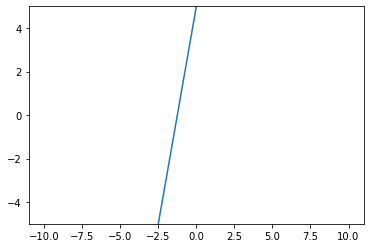

In [87]:
f(4,5)

In [88]:
interactive_plot=interactive(f,m=(-2.0,2.0),b=(-3,3,0.5))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [90]:
def slow_function(i):
    from time import sleep
    print("sleeping...")
    sleep(1)
    print(i)
interact_manual(slow_function,i=widgets.FloatSlider(min=1e4,max=1e6,step=1e4))    

interactive(children=(FloatSlider(value=10000.0, description='i', max=1000000.0, min=10000.0, step=10000.0), B…

<function __main__.slow_function(i)>

In [92]:
foo=interactive(slow_function,{"manual":True}, i=widgets.FloatSlider(min=1e4,max=1e6, step=1e4))
foo

interactive(children=(FloatSlider(value=10000.0, description='i', max=1000000.0, min=10000.0, step=10000.0), B…

In [96]:
a=widgets.IntSlider()
b=widgets.IntSlider()
c=widgets.IntSlider()

ui=widgets.HBox([a,b,c])

def f(a,b,c):
    print((a,b,c))
    return (a+b+c)

out=widgets.interactive_output(f,{"a":a,"b":b, "c":c})
display(ui,out)

Output()

In [97]:
def reverse(x):
    return x[::-1]
reverse(" ibackwards")


'sdrawkcabi '

interactive(children=(FloatSlider(value=1.0, description='k', max=2.0, min=0.5), FloatSlider(value=2.0, descri…

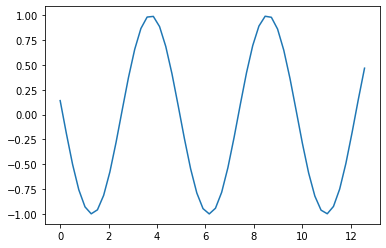

In [100]:
@interact(k=(0.5,2), p=(0,2*np.pi))
def plot_f(k=1,p=2):
    x=np.linspace(0,4*np.pi)
    y=np.sin(k*x +p)
    plt.plot(x,y)
    
plot_f(1.3,3)

In [103]:
a= widgets.FloatText()
b= widgets.FloatSlider()
display(a,b)

mylink= widgets.link((a,"value"),(b,"value"))

FloatText(value=0.0)

FloatSlider(value=0.0)

In [128]:
out1=widgets.Output(layout={"border": "1px solid black"})
out1

with out1:
    for i in range(2):
        print(i, "Practice !")

from IPython.display import YouTubeVideo
with out1:
    display(YouTubeVideo("7equ8iCkaoY"))
out1

Output(layout=Layout(border='1px solid black'), outputs=({'output_type': 'stream', 'text': '0 Practice !\n1 Pr…

In [129]:
with out1:
    display(widgets.IntSlider())

In [133]:
a=widgets.IntSlider(description="a")
b=widgets.IntSlider(description="b")
c=widgets.IntSlider(description="c")

def f(a,b,c):
    print("{}*{}*{}={}".format(a,b,c,a*b*c))

out1=widgets.interactive_output(f, {"a":a,"b":b,"c":c})
widgets.HBox([widgets.VBox([a,b,c]),out1])

## 4. Widget  Box Layout

In [135]:
b=Button(description="Hola (50% width, 80px height) button",
        layout=Layout(width="50%", height="80px", border="2px dotted blue"))
b

Button(description='Hola (50% width, 80px height) button', layout=Layout(border='2px dotted blue', height='80p…

In [136]:
Button(description="Hola layout", layout=b.layout)

Button(description='Hola layout', layout=Layout(border='2px dotted blue', height='80px', width='50%'), style=B…

In [138]:
words=["Hola","Hello","Hallo","Hi"]
items=[Button(description=w) for w in words]
left_box=VBox([items[0],items[1]])
right_box=VBox([items[2],items[3]])
HBox([left_box,right_box])

In [139]:
items_layout=Layout(width="auto")
box_layout=Layout(display="flex",
                 flex_flow="column",
                 align_items="stretch",
                 border="solid",
                 width="20%")
words=["Hola","Love","Peace","Dance"]
items=[Button(description=word, layout=items_layout, button_style="danger") for word in words]
box=Box(children=items,layout=box_layout)
box

Box(children=(Button(button_style='danger', description='Hola', layout=Layout(width='auto'), style=ButtonStyle…

In [149]:
item_layout=Layout(height="100px", min_width="40px")
items=[Button(layout=item_layout,description=str(i),button_style="warning")
      for i in range(13)]
box_layout=Layout(overflow_x="scroll",
                 border="3px solid black",
                 width="500px",
                 height="",
                 flex_flow="row",
                 display="flex")
carousel=Box(children=items, layout=box_layout)
VBox([Label("Scroll horizontally:"),carousel])
#items[0].layout.min_width="10px"

In [156]:
GridBox(children=[Button(description=str(i),
                        layout=Layout(width="auto", height="auto"),
                              style=ButtonStyle(button_color="darkseagreen")) for i in range (8)],
     
        layout=Layout(width="50%",
                    grid_template_columns="100px 50px 100px",
                    grid_template_row="80px auto 80px",
                    grid_gap="5px 10px")
)


GridBox(children=(Button(description='0', layout=Layout(height='auto', width='auto'), style=ButtonStyle(button…

In [162]:
header=Button(description="Header",
             layout=Layout(width="auto",grid_area="header"),
             style=ButtonStyle(button_color="lightblue"))

main=Button(description="Main",
             layout=Layout(width="auto",grid_area="main"),
             style=ButtonStyle(button_color="moccasin"))

sidebar=Button(description="Sidebar",
             layout=Layout(width="auto",grid_area="sidebar"),
             style=ButtonStyle(button_color="salmon"))

footer=Button(description="Footer",
             layout=Layout(width="auto",grid_area="footer"),
             style=ButtonStyle(button_color="olive"))

GridBox(children=[header,main, sidebar,footer],
       layout=Layout(
       width="50%",
       grid_template_rows="auto auto auto",
       grid_template_columns="25% 25% 25% 25%",
       grid_template_areas='''
       "header header header header"
       "main main. sidebar"
       "footer footer footer footer"
       ''')
       )


GridBox(children=(Button(description='Header', layout=Layout(grid_area='header', width='auto'), style=ButtonSt…